#  <u>*Auto Mobile Analysis .*</u>

## <u>*Analysis objective*</u>
### *To predict the Auto Mobile Prices based on given features inputs*

---

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"]=(20,10)
import seaborn as sns;sns.set()
import warnings
warnings.filterwarnings('ignore')

## *Importing data*

In [7]:
df=pd.read_csv(r"./automobile_data.csv")
df.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


## *Data shape*

In [8]:
df.shape

(205, 26)

## *Data info*

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  205 non-null    object 
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       205 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

---

## *Data Cleaning*

*A. colums names cleaning: (converting all to small letters and add "_" in spaces between words)*

In [10]:
import janitor
df=df.clean_names()

*B. Replaing "?" symbol with nan-value :*

In [11]:
df=df.replace("?",np.nan)

*C. na-values :*

In [12]:
print(f"The total number of na values are {df.isna().sum().sum()}")
print()
print("The number of na-values in each features are :")
df.isna().sum()

The total number of na values are 59

The number of na-values in each features are :


symboling             0
normalized_losses    41
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64

*-- We will replce the NA Values wuth randomly selcted values for the same dataset*

In [15]:
from feature_engine.imputation import RandomSampleImputer
rand_imput=RandomSampleImputer(seeding_method="add")
rand_imput.fit(df)
rand_imput.transform(df)
df=rand_imput.transform(df)

*D. converting features into desired Data Type:*

In [16]:
df=df.infer_objects()
df[["normalized_losses","horsepower","peak_rpm","price"]]=df[["normalized_losses","horsepower","peak_rpm","price"]].astype("int64")
df[["bore","stroke"]]=df[["bore","stroke"]].astype("float64")

---

*Saving the new cleaned dataset*

In [17]:
df.to_csv(r"./new_cleaned_df.csv", index=False)

## *Exploratory Data Analysis - EDA*

*A. categorical & numerical_features:*

In [18]:
categorical_features=df.select_dtypes(include=["object"])
numerical_features=df.select_dtypes(exclude=["object"])

In [19]:
print("we have {} numerical features : {}".format(numerical_features.shape[1],list(numerical_features.columns)))
print("we have {} categorical features : {}".format(categorical_features.shape[1],list(categorical_features.columns)))

we have 16 numerical features : ['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
we have 10 categorical features : ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 'fuel_system']


*B. Basic data statistics:*

* *Numerical data statistics :*

In [20]:
pd.DataFrame(numerical_features).describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized_losses,205.0,120.712195,35.693687,65.00,94.00,110.00,150.00,256.00
wheel_base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb_weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine_size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.330341,0.271669,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.250293,0.322554,2.07,3.11,3.29,3.41,4.17


* *Categorical data statistics :*

In [21]:
pd.DataFrame(categorical_features).describe().T

,count,unique,top,freq
make,205,22,toyota,32
fuel_type,205,2,gas,185
aspiration,205,2,std,168
num_of_doors,205,2,four,115
body_style,205,5,sedan,96
drive_wheels,205,3,fwd,120
engine_location,205,2,front,202
engine_type,205,7,ohc,148
num_of_cylinders,205,7,four,159
fuel_system,205,8,mpfi,94


*C. EDA - Data Visualization:*

* *Numerical features Visualization :*

In [22]:
# creating one function for plotting numerical_features
def plot_numerical_features(numerical_features):
    nrows = 4
    ncols = 4

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15,10))
    
    axes = axes.flatten()

    for i, column in enumerate(numerical_features.columns):
        if i >= nrows * ncols:
            break 
        numerical_features[column].plot(ax=axes[i], kind="box")

    plt.tight_layout()
    plt.show()


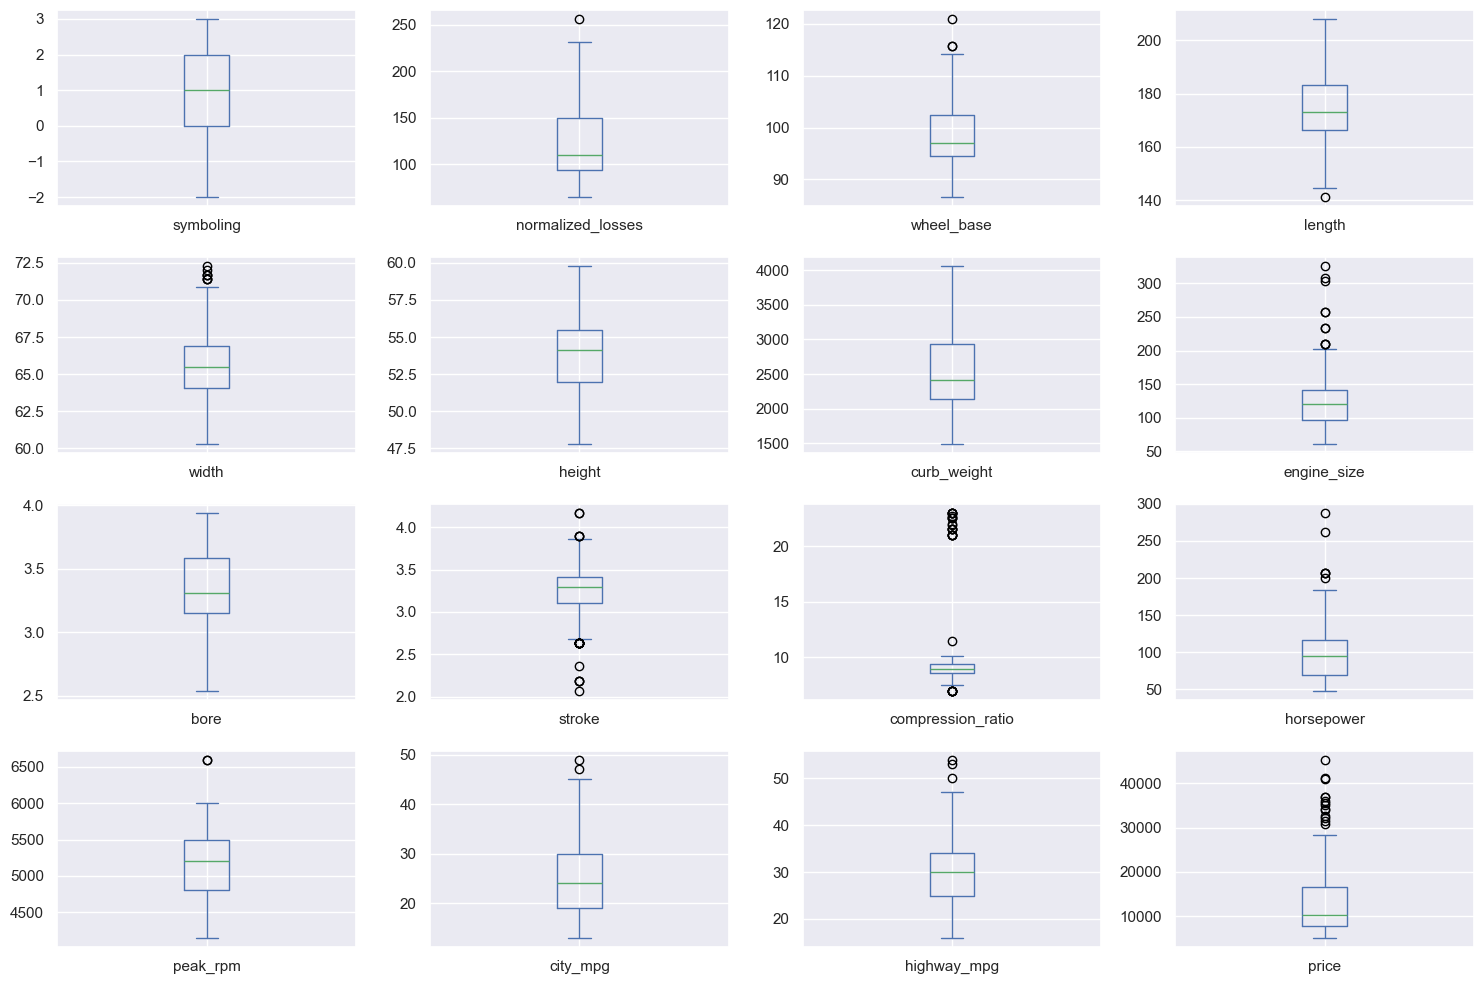

In [23]:
plot_numerical_features(numerical_features)

 * *we can see that some faetures looks like it has outliers except (sympoling,bore,height,curb_wieght)  features, but when we have a close look at these data points we can see that these points are not close to the 4th quantule range and not extremnly vary*

In [24]:
for i in numerical_features:
    if i in ['normalized_losses', 'wheel_base', 'width','engine_size', 'stroke','compression_ratio','horsepower', 'peak_rpm', 'city_mpg','highway_mpg', 'price']:
        print(numerical_features[i].sort_values(ascending=False).head(10),"\n","--"*10)

190    256
106    231
179    197
178    197
105    194
104    194
130    194
10     192
11     192
82     188
Name: normalized_losses, dtype: int64 
 --------------------
73     120.9
70     115.6
71     115.6
114    114.2
113    114.2
109    114.2
110    114.2
48     113.0
47     113.0
74     112.0
Name: wheel_base, dtype: float64 
 --------------------
129    72.3
74     72.0
71     71.7
70     71.7
73     71.7
7      71.4
8      71.4
6      71.4
17     70.9
49     70.6
Name: width, dtype: float64 
 --------------------
49    326
73    308
74    304
48    258
47    258
71    234
72    234
16    209
17    209
15    209
Name: engine_size, dtype: int64 
 --------------------
47     4.17
48     4.17
29     3.90
130    3.90
131    3.90
84     3.86
83     3.86
124    3.86
82     3.86
69     3.64
Name: stroke, dtype: float64 
 --------------------
192    23.0
184    23.0
182    23.0
187    23.0
203    23.0
63     22.7
174    22.5
158    22.5
159    22.5
66     22.0
Name: compression_ratio, 

* *Categorical features Visualization :*

In [25]:
# creating one function for plotting categorical_features
def plot_categorical_features(categorical_features):
    nrows = 3
    ncols = 3
    
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 7))

    axes = axes.flatten()
    
    for i, column in enumerate(categorical_features.columns):
        if i >= nrows * ncols:
            break 
        ax = axes[i]
        counts = categorical_features[column].value_counts()
        counts.plot(kind='bar', ax=ax, title=column)
        
        for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )
        
    plt.tight_layout()
    plt.show()

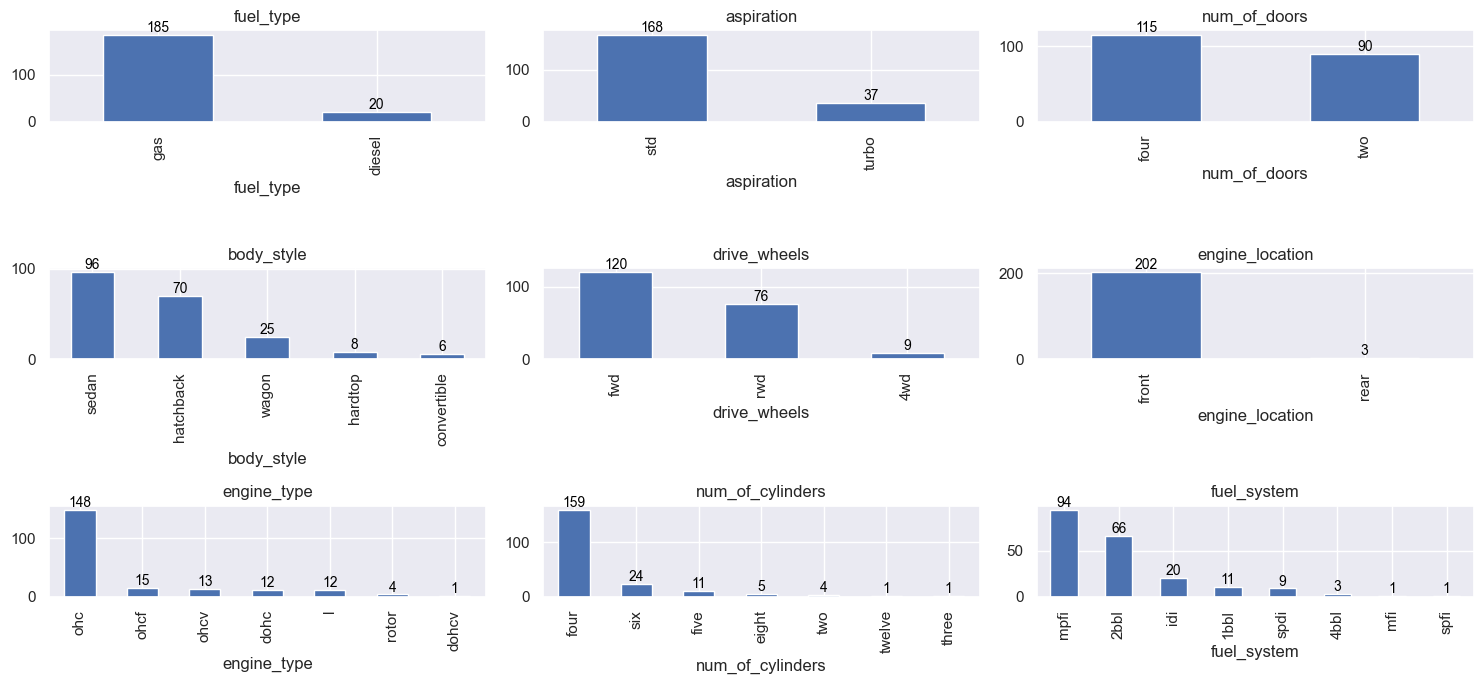

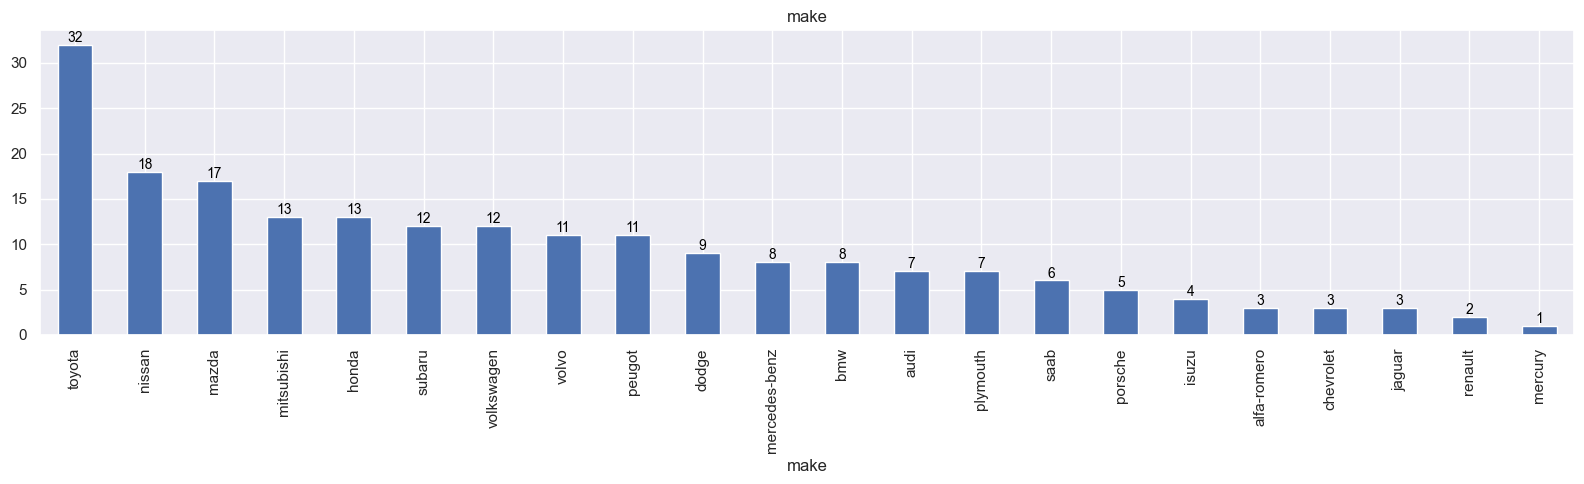

In [26]:
plot_categorical_features(categorical_features.iloc[:,1:])
counts = categorical_features["make"].value_counts()
ax = counts.plot(kind='bar', figsize=(16, 5), title="make")
for bar in ax.patches:
            ax.annotate(
                str(bar.get_height()),
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points'
            )

plt.tight_layout()
plt.show() 


*C. EDA Correlation*

* *Correlation - price as target fetaure*

* *As the data are not normally ditributed we will use spearman meathos*

In [27]:
numerical_features.corr(method="spearman")["price"]

symboling           -0.153893
normalized_losses    0.122331
wheel_base           0.671938
length               0.789420
width                0.788536
height               0.244795
curb_weight          0.888732
engine_size          0.804142
bore                 0.618719
stroke               0.106063
compression_ratio   -0.173972
horsepower           0.828843
peak_rpm            -0.072516
city_mpg            -0.809105
highway_mpg         -0.808858
price                1.000000
Name: price, dtype: float64

* *Correlation -heatmap- price as target fetaure*

<Axes: >

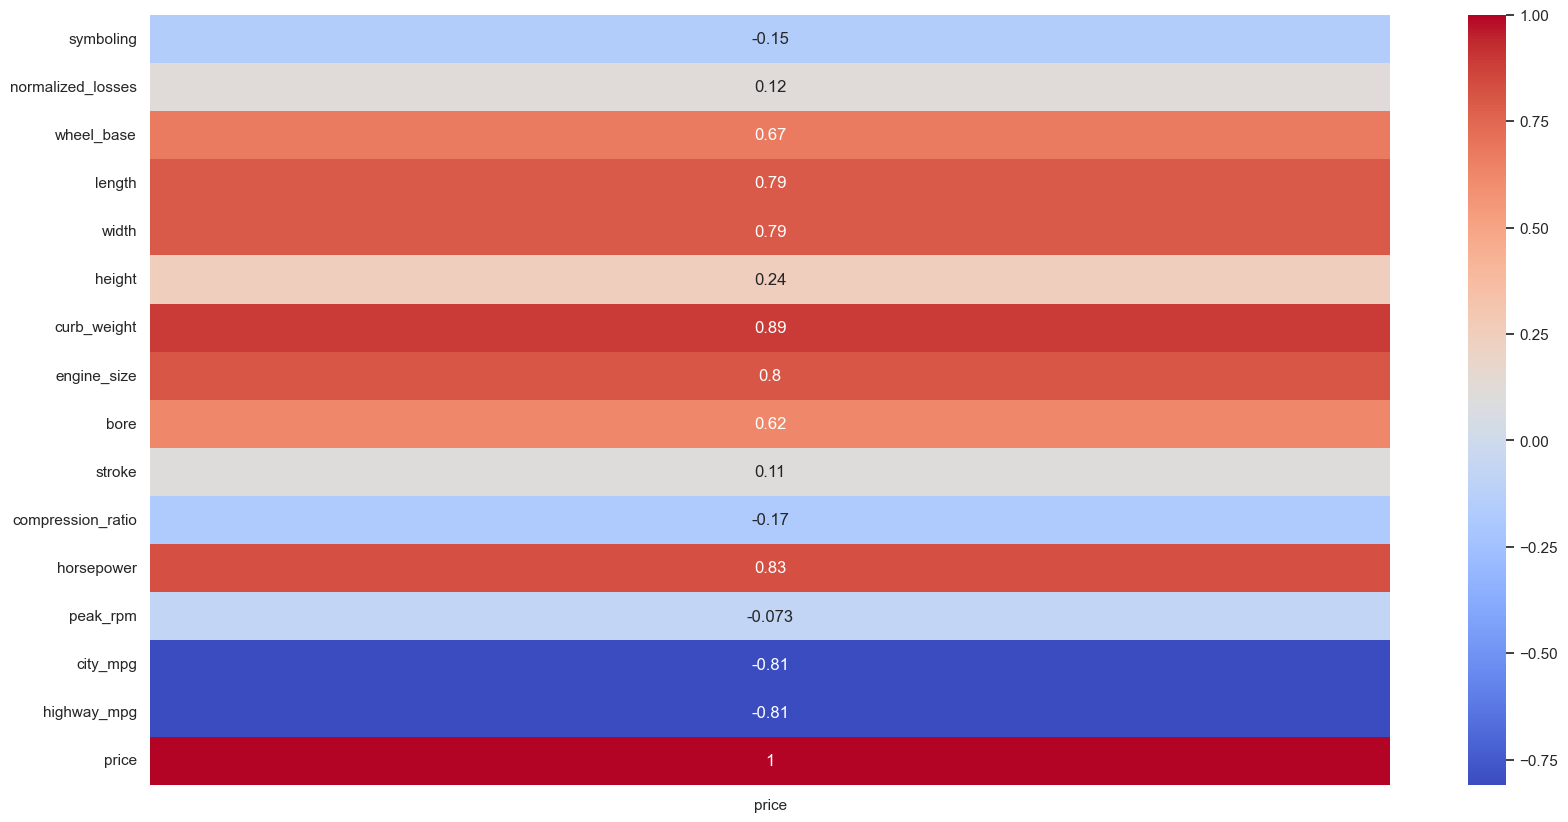

In [28]:
sns.heatmap((numerical_features.corr(method="spearman")["price"]).to_frame(),annot=True,cmap='coolwarm')

* *Correlation -scatterplot- price as target fetaure*

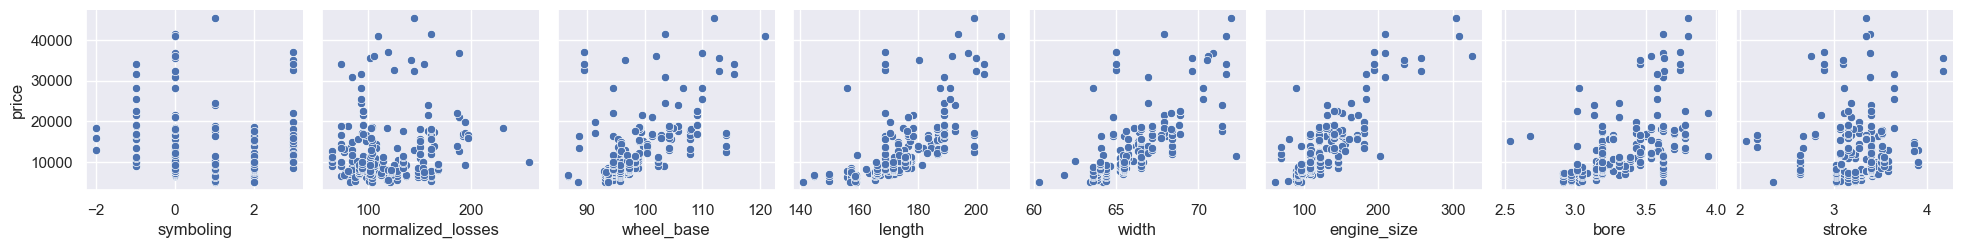

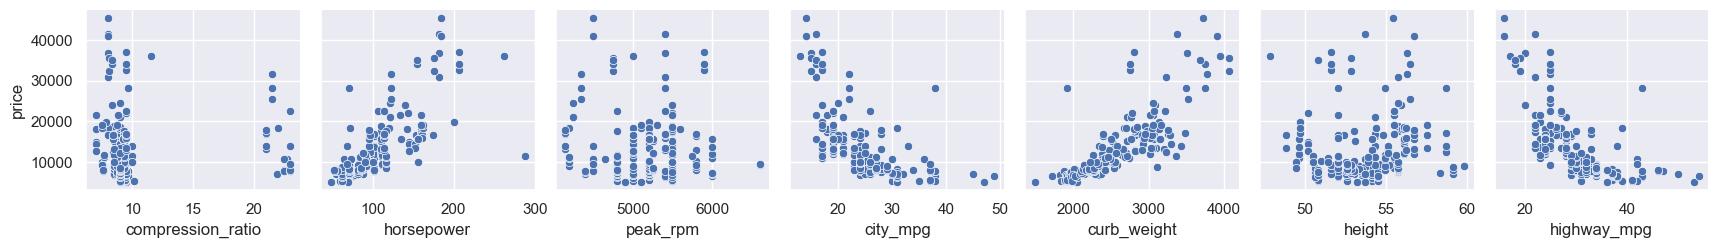

In [29]:
sns.pairplot(data=numerical_features,
             x_vars=['symboling', 'normalized_losses', 'wheel_base', 'length', 'width','engine_size', 'bore', 'stroke'],
             y_vars='price');

sns.pairplot(data=numerical_features,
             x_vars=['compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg','curb_weight','height','highway_mpg'],
             y_vars='price');

---

## *Data Modelling*

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_percentage_error,r2_score,mean_absolute_error,accuracy_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRFRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score,KFold
from sklearn.preprocessing import LabelEncoder,StandardScaler
from tqdm import tqdm

*Date preprocessing*

In [31]:
categories_encoder=LabelEncoder()

In [32]:
for col in df:
    if col in list(df.select_dtypes(include="object").columns):
        df[col]=categories_encoder.fit_transform(df[col])
        

In [33]:
df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,83,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495
1,3,94,0,1,0,1,0,2,0,88.6,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500
2,1,161,0,1,0,1,2,2,0,94.5,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,1,1,0,0,3,1,0,99.8,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,1,1,0,0,3,0,0,99.4,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450


*Define x and y*

In [34]:
x=df.drop(["price"],axis=1)
y=df["price"]

*Splitting data into training and testing subsets*

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x,y ,test_size= 0.20)

print("Train data shape of X = % s and Y = % s : "%(
	x_train.shape, y_train.shape))

print("Test data shape of X = % s and Y = % s : "%(
	x_test.shape, y_test.shape))

Train data shape of X = (164, 25) and Y = (164,) : 
Test data shape of X = (41, 25) and Y = (41,) : 


*Data Scaling*

In [36]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [37]:
models = {
                "RandomForestRegressor": RandomForestRegressor(),
                "DecisionTreeRegressor": DecisionTreeRegressor(),
                "LinearRegression": LinearRegression(),
                "XGBRFRegressor": XGBRFRegressor(),
                "GradientBoostingRegressor":GradientBoostingRegressor(),
                "AdaBoostRegressor": AdaBoostRegressor(),
                "BaggingRegressor":BaggingRegressor()
                
                
            }

params={        
                "RandomForestRegressor":{
                    "n_estimators":[90,100,110], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.8,1],
                    "bootstrap":[True, False],                                                                                                    
                    "max_features":["sqrt","log2","auto"],                                     
                    "max_depth":[2,3,4],
                    "criterion":['poisson', 'squared_error','friedman_mse','absolute_error']
                    },

                "DecisionTreeRegressor": {
                    'criterion':['poisson', 'squared_error','friedman_mse','absolute_error'],
                    'splitter': ['best', 'random'],
                    "max_depth":[2,3,4], 
                    "min_samples_split":[2,4,6],
                    "min_samples_leaf":[0.5,0.8],
                    #'max_features': [1,2,3,4],
                },
                "LinearRegression":{

                },
                "XGBRFRegressor":{
                    'learning_rate': [0.001,0.1,1],
                    'n_estimators': [90, 100, 110], 
                    "booster":["gbtree"],
                    'colsample_bytree': [0.5,0.8], 
                    'colsample_bynode': [0.5,0.8],
                    'random_state':[42]
                },

                
                "GradientBoostingRegressor":{
                    #'loss':['squared_error', 'huber', 'absolute_error', 'quantile'],
                    'learning_rate': [0.01,0.1,1],
                    'n_estimators': [90, 100, 110],
                    'subsample': [0.8,1],
                    #'criterion':['squared_error', 'friedman_mse'],
                    'min_samples_split': [2, 4, 6],
                    'min_samples_leaf': [0.8, 1],
                    'max_depth':[2,3,4],
                    #'max_features': ['sqrt', 'log2', 'auto']
                },
                "AdaBoostRegressor":{
                    'n_estimators': [45,50,55],
                    'learning_rate': [0.0001,0.001,0.01],
                    'loss':['linear','square','exponential'],
                    #'random_state':[42]
                    
                },
                "BaggingRegressor":{},
                
            }

In [38]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    print(list(models.keys())[i])

    print("Model Performance for Train Data")
    print("mean_absolute_percentage_error : {:.4f}".format(model_train_mean_absolute_percentage_error))
    print("model_train_r2_score : {:.4f}".format(model_train_r2_score))

    print("------------------------------------------------------")

    print("Model Performance for test Data")
    print("model_test_mean_absolute_percentage_error : {:.4f}".format(model_test_mean_absolute_percentage_error))
    print("model_test_r2_score : {:.4f}".format(model_test_r2_score))


    print("="*35)
    print("\n")

RandomForestRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0517
model_train_r2_score : 0.9738
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1616
model_test_r2_score : 0.8837


DecisionTreeRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0023
model_train_r2_score : 0.9997
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.2613
model_test_r2_score : 0.5953


LinearRegression
Model Performance for Train Data
mean_absolute_percentage_error : 0.1639
model_train_r2_score : 0.8380
------------------------------------------------------
Model Performance for test Data
model_test_mean_absolute_percentage_error : 0.1788
model_test_r2_score : 0.8431


XGBRFRegressor
Model Performance for Train Data
mean_absolute_percentage_error : 0.0629
model_train_r2_score : 0.9709
-----

In [39]:
report = {}
report2={}
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(x_train,y_train)

    y_train_prediction=model.predict(x_train)
    y_test_prediction=model.predict(x_test)

    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

    model_train_r2_score=r2_score(y_train,y_train_prediction)
    model_test_r2_score=r2_score(y_test,y_test_prediction)

    report[list(models.keys())[i]] = model_train_mean_absolute_percentage_error
    report2[list(models.keys())[i]] = model_test_mean_absolute_percentage_error

train_report=pd.DataFrame(report,index=report.keys()).iloc[0].reset_index().rename(columns={"index":"model","RandomForestRegressor":"model_train_mean_absolute_percentage_error"})    
test_report=pd.DataFrame(report2,index=report.keys()).iloc[0].reset_index().rename(columns={"index":"model","RandomForestRegressor":"model_test_mean_absolute_percentage_error"})
final_report=pd.concat([train_report,test_report["model_test_mean_absolute_percentage_error"]],axis=1)


In [40]:
final_report

,model,model_train_mean_absolute_percentage_error,model_test_mean_absolute_percentage_error
0,RandomForestRegressor,0.053408,0.145146
1,DecisionTreeRegressor,0.002302,0.264692
2,LinearRegression,0.163947,0.178765
3,XGBRFRegressor,0.062898,0.160556
4,GradientBoostingRegressor,0.049344,0.139321
5,AdaBoostRegressor,0.155084,0.209763
6,BaggingRegressor,0.058129,0.138124


In [41]:
best_model_score = min(sorted(final_report["model_test_mean_absolute_percentage_error"]))
best_model_score

0.13812393326882388

In [42]:
best_model_name = list(final_report["model"])[
                list(final_report["model_test_mean_absolute_percentage_error"]).index(best_model_score)]
best_model_name

'BaggingRegressor'

In [43]:
model=BaggingRegressor().fit(x_train,y_train)

In [44]:
predicted=model.predict(x_test)

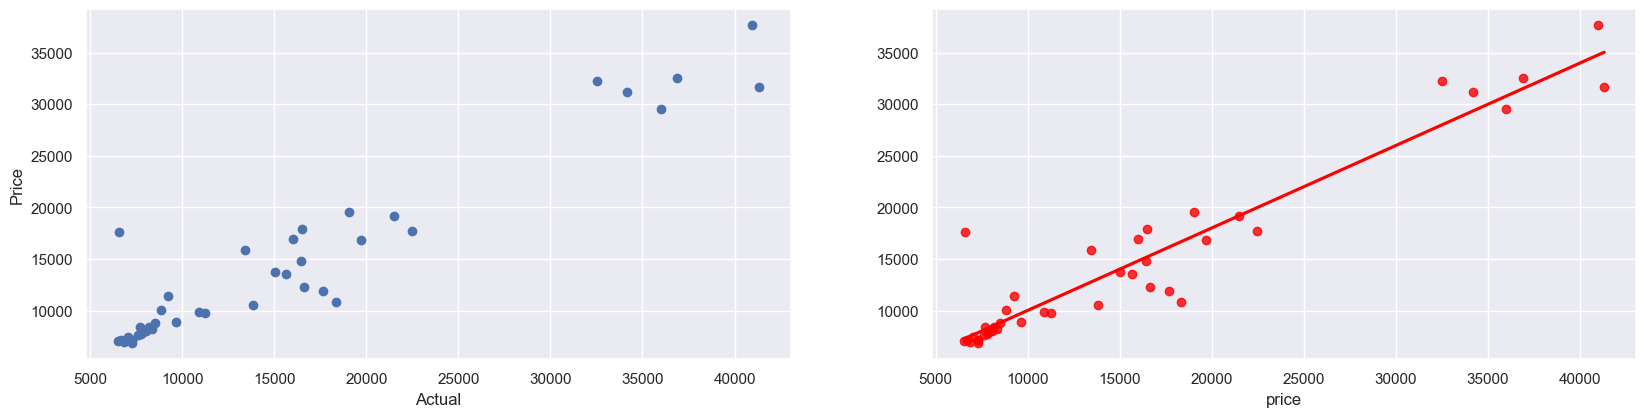

In [45]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('Price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');

* *applying randomsearch hyperparameter tuning*

In [46]:
def evaluate_models(x_train,y_train,x_test,y_test,models,params):            
                report = {}
                #report2={}
                for i in tqdm(range(len(list(models)))):
                    model=list(models.values())[i]
                    para=params[list(models.keys())[i]]

                    RandomSearchCV=RandomizedSearchCV(model,param_distributions= para,cv=3)
                    RandomSearchCV.fit(x_train,y_train)

                    model.set_params(**RandomSearchCV.best_params_)
                    model.fit(x_train,y_train)

                    y_train_prediction=model.predict(x_train)
                    y_test_prediction=model.predict(x_test)

                    model_train_mean_absolute_percentage_error=mean_absolute_percentage_error(y_train,y_train_prediction)
                    model_test_mean_absolute_percentage_error=mean_absolute_percentage_error(y_test,y_test_prediction)

                    model_train_r2_score=r2_score(y_train,y_train_prediction)
                    model_test_r2_score=r2_score(y_test,y_test_prediction)

                    #report[list(models.keys())[i]] = model_train_mean_absolute_percentage_error
                    report[list(models.keys())[i]] = (model_train_mean_absolute_percentage_error,model_test_mean_absolute_percentage_error,model_train_r2_score,model_test_r2_score,
                                                      RandomSearchCV.best_params_)


                return report

In [47]:
model_report:dict=evaluate_models(x_train, y_train, x_test, y_test,models=models,params=params)

100%|██████████| 7/7 [00:24<00:00,  3.56s/it]


In [48]:
model_report

{'RandomForestRegressor': (np.float64(0.1781105022376361),
  np.float64(0.1763236326975578),
  0.7962633877283085,
  0.7913185731480853,
  {'n_estimators': 100,
   'min_samples_split': 4,
   'min_samples_leaf': 1,
   'max_features': 'sqrt',
   'max_depth': 2,
   'criterion': 'friedman_mse',
   'bootstrap': True}),
 'DecisionTreeRegressor': (np.float64(0.4765357385363861),
  np.float64(0.4945448533531564),
  0.0,
  -0.0723171789414252,
  {'splitter': 'best',
   'min_samples_split': 6,
   'min_samples_leaf': 0.8,
   'max_depth': 4,
   'criterion': 'squared_error'}),
 'LinearRegression': (np.float64(0.1639466156347139),
  np.float64(0.17876475834196806),
  0.8380269814111913,
  0.8430881610330266,
  {}),
 'XGBRFRegressor': (np.float64(0.07120277428182992),
  np.float64(0.14061591248117103),
  0.9698728322982788,
  0.9012168049812317,
  {'random_state': 42,
   'n_estimators': 90,
   'learning_rate': 1,
   'colsample_bytree': 0.5,
   'colsample_bynode': 0.5,
   'booster': 'gbtree'}),
 'Grad

In [49]:
model_report_df=pd.DataFrame(model_report).iloc[:-1] 

In [50]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor
0,0.178111,0.476536,0.163947,0.071203,0.198102,0.124171,0.066457
1,0.176324,0.494545,0.178765,0.140616,0.252559,0.138966,0.153493
2,0.796263,0.0,0.838027,0.969873,0.828999,0.880343,0.950065
3,0.791319,-0.072317,0.843088,0.901217,0.756901,0.904111,0.893396


In [51]:
model_report_df["metrices"]=["model_train_mean_absolute_percentage_error","model_test_mean_absolute_percentage_error","model_train_r2_score","model_test_r2_score"]

In [52]:
model_report_df

,RandomForestRegressor,DecisionTreeRegressor,LinearRegression,XGBRFRegressor,GradientBoostingRegressor,AdaBoostRegressor,BaggingRegressor,metrices
0,0.178111,0.476536,0.163947,0.071203,0.198102,0.124171,0.066457,model_train_mean_absolute_percentage_error
1,0.176324,0.494545,0.178765,0.140616,0.252559,0.138966,0.153493,model_test_mean_absolute_percentage_error
2,0.796263,0.0,0.838027,0.969873,0.828999,0.880343,0.950065,model_train_r2_score
3,0.791319,-0.072317,0.843088,0.901217,0.756901,0.904111,0.893396,model_test_r2_score


In [53]:
BaggingRegressor_best_paramerts=[k[4] for i,k in model_report.items() if i=="BaggingRegressor"]
BaggingRegressor_best_paramerts

[{}]

In [54]:
model=GradientBoostingRegressor(
   ).fit(x_train,y_train)

In [55]:
predicted=model.predict(x_test)

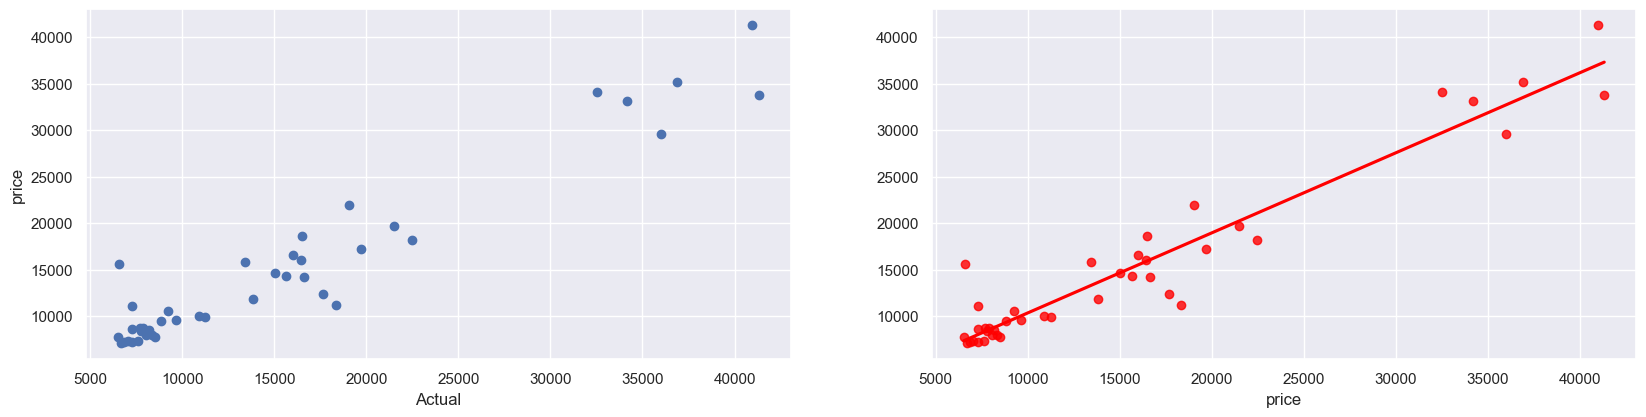

In [56]:
plt.subplot(221)
plt.scatter(y_test,predicted);

plt.xlabel('Actual');
plt.ylabel('price');

plt.subplot(222)
sns.regplot(x=y_test,y=predicted,ci=None,color ='red');